<a href="https://colab.research.google.com/github/praxita21/Airbnb-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

## First import required libraries and packages

In [1]:
# For Manipulations
import numpy as np
import pandas as pd

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Load and read the CSV file

In [2]:
#importing the data by mounting the google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Loading the data set
path = "/content/drive/MyDrive/Capstone project/Copy of Airbnb NYC 2019.csv"

In [4]:
airbnb_data = pd.read_csv(path)
# Succesfully loaded

In [5]:
# checking the data
airbnb_data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [7]:
# checking the shape of the dataset

print('Shape of the dataset', airbnb_data.shape)

Shape of the dataset (48895, 16)


In [8]:
# checking the info of the dataset

airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [9]:
# columns of the dataset

airbnb_data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [10]:
# see the top 5 rows and columns of dataset

airbnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [11]:
# last 5 rows and columns
airbnb_data.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


From the above observations we can see:

1). There are 48895 rows and 16 columns in our dataset.

2). In which 6 are categorical and 10 are numerical.

3). In few columns null value is present so we need to remove that.

In [12]:
print('These are some columns which have NULL values \n \n', airbnb_data.loc[:, ['name', 'host_name', 'last_review', 'reviews_per_month']] == 'NaN')

These are some columns which have NULL values 
 
         name  host_name  last_review  reviews_per_month
0      False      False        False              False
1      False      False        False              False
2      False      False        False              False
3      False      False        False              False
4      False      False        False              False
...      ...        ...          ...                ...
48890  False      False        False              False
48891  False      False        False              False
48892  False      False        False              False
48893  False      False        False              False
48894  False      False        False              False

[48895 rows x 4 columns]


In the column [name] and [host_name] which have 16 and 21 null value only. But in the column [last_review] and [reviews_per_month] both which have most null values is 10052

## **Cleaning the Datasets**

In [13]:
# remove some columns 

airbnb_data.drop(['last_review', 'reviews_per_month'], axis=1, inplace=True)

In [14]:
airbnb_data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,6,2


**Removed some columns what we don't need so our dataset is more clear**

Fill null values with Not Present

In [15]:
# code here

airbnb_data['name'].fillna('Not present', inplace=True)
airbnb_data['host_name'].fillna('Not present', inplace=True)

In [16]:
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  calculated_host_listings_count  

In [17]:
# Checking for null values in the new dataset
print(f'The number of missing values after cleaning the data are:')
airbnb_data.isnull().sum()

The number of missing values after cleaning the data are:


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Now we have dropped all the null values from our dataset.

## Let's look at the visulization and analysis part. Also answer the questions at the start of the notebook.

Top listing counts

In [18]:
# Showing top 15 hosts in terms of listing count
top_host_id = airbnb_data['host_id'].value_counts().head(15)

In [19]:
top_host_id

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
1475015       52
120762452     50
2856748       49
205031545     49
190921808     47
Name: host_id, dtype: int64

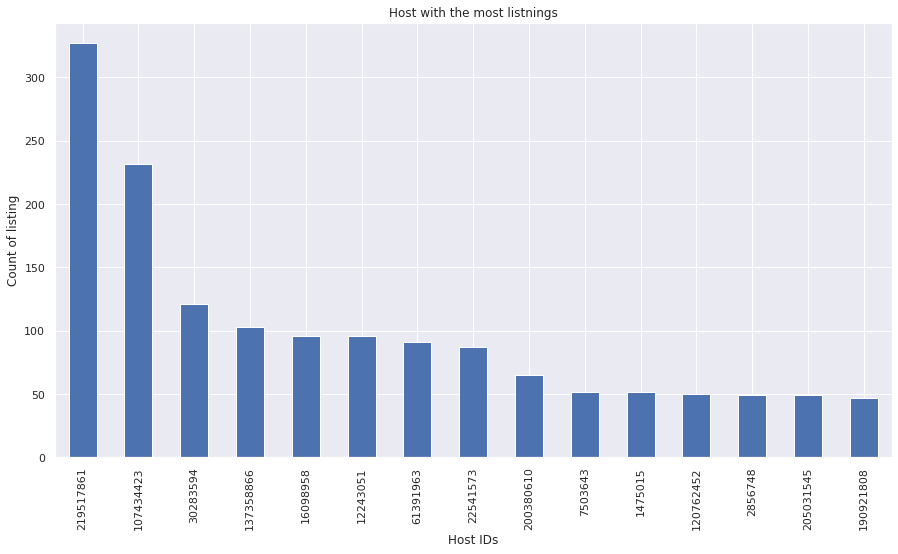

In [20]:
from matplotlib import figure
# set the figure size for data visualizations plot using a bar chart
sns.set(rc={'figure.figsize' : (15,8)})
host_bar = top_host_id.plot(kind='bar')
host_bar.set_title('Host with the most listnings')
host_bar.set_xlabel('Host IDs')
host_bar.set_ylabel('Count of listing')
plt.plot(top_host_id)
plt.show()

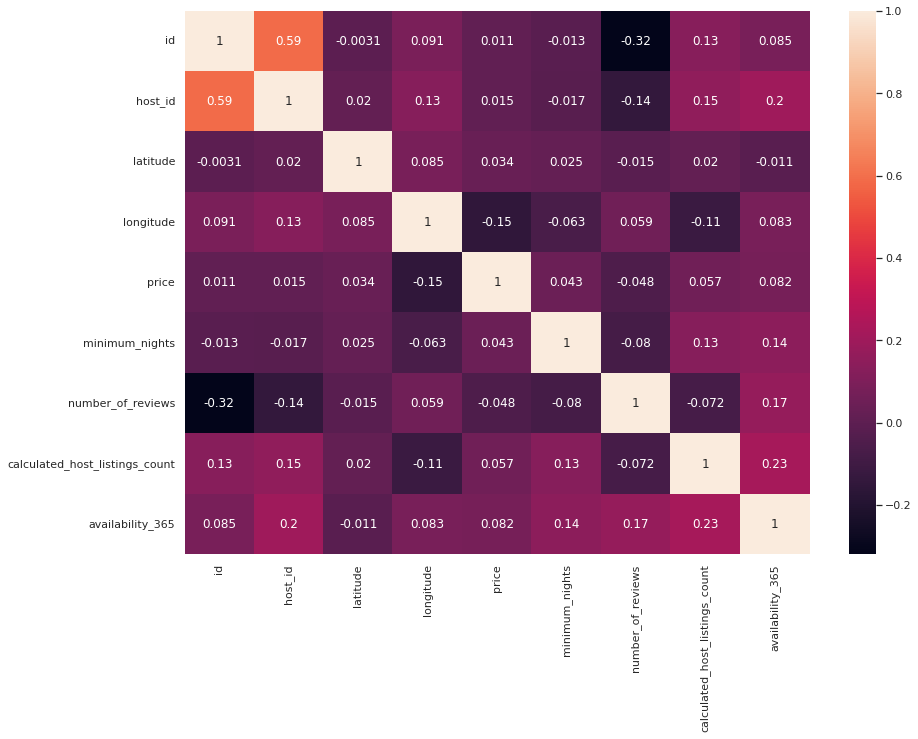

In [21]:
from numpy.lib.shape_base import column_stack
# Correlation matrix

plt.figure(figsize=(14,10))
sns.heatmap(airbnb_data.corr(),annot=True)

From the above plot we can see that there is not much observable correlation between variables

In [22]:
# Separating the numeric and categorical features.

numeric_features = airbnb_data.describe().columns

categorical_fetures = airbnb_data.describe(exclude=[int, float]).columns

print('Numeric Features:',list(numeric_features))
print('_'*160)
print('Categorical Features:',list(categorical_fetures))

Numeric Features: ['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']
________________________________________________________________________________________________________________________________________________________________
Categorical Features: ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type']


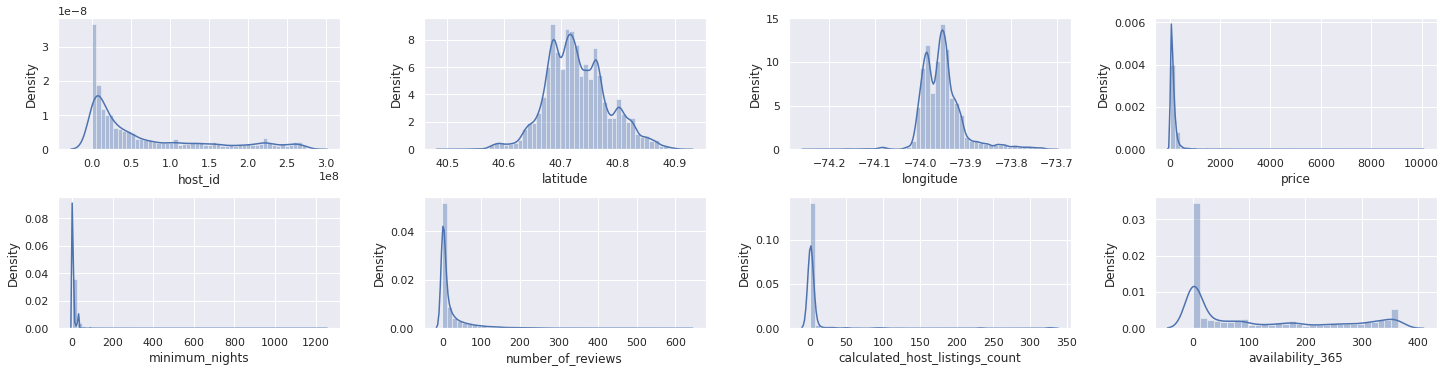

In [23]:
# Lets first check out the numeric_features and understand their distributions.

names = numeric_features.values[1:]  #exclude id column.
ncols = 4
nrows = 2
fig, axes = plt.subplots(nrows,ncols, figsize=(20,5))
fig.tight_layout(h_pad=2, w_pad=4)

for name, ax in zip(names, axes.flatten()):
    sns.distplot(airbnb_data[name], ax=ax)
    
plt.show()

From the distplots it can be observed that latitude and longitude data seem to be normally distributed and most of the numeruc_features are positively skewed.

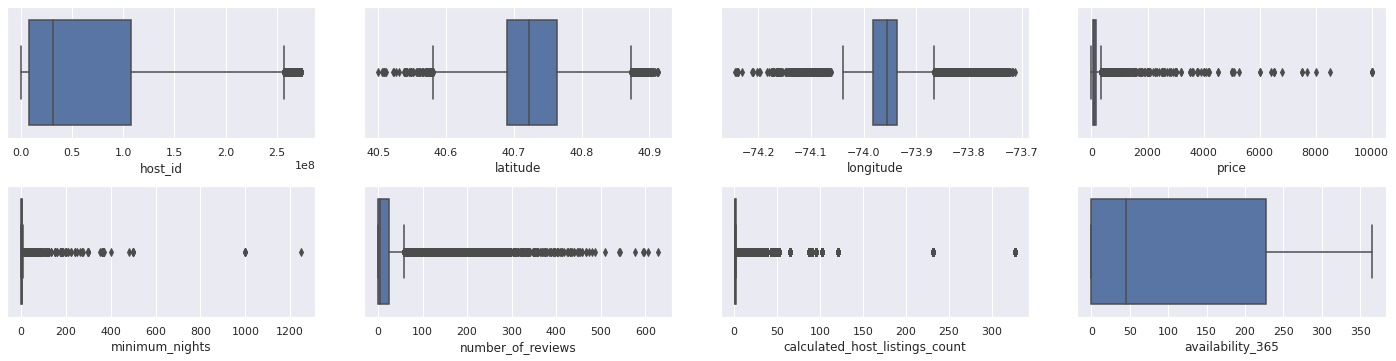

In [24]:
#checking the OutLiers!!
#Plot boxplots to find the distribution
boxplot_data= airbnb_data[numeric_features[1:]]
names = boxplot_data.columns
nrows=2
ncols = 4
fig, axes = plt.subplots(nrows,ncols, figsize=(20,5))
fig.tight_layout(h_pad=2)

for name, ax in zip(names, axes.flatten()):
    sns.boxplot(x=name, data=boxplot_data, ax=ax)
    
plt.show()

The boxplots indicate that the features contain mild as well as extreme outliers present which can be treated either using the IQR or the Z-score.

## **What can we learn about different hosts and areas?**

we will see how hosts are preferring rooms w.r.t. areas.



In [25]:
# Groupby the different id's w.r.t neighbourhood_groups.

hosts_and_areas_df = airbnb_data.groupby(['neighbourhood_group'],as_index=False)['id'].count().sort_values(['id'],ascending=False).rename(columns={'neighbourhood_group':'area', 'id':'host_count'})
hosts_and_areas_df

,area,host_count
2,Manhattan,21661
1,Brooklyn,20104
3,Queens,5666
0,Bronx,1091
4,Staten Island,373


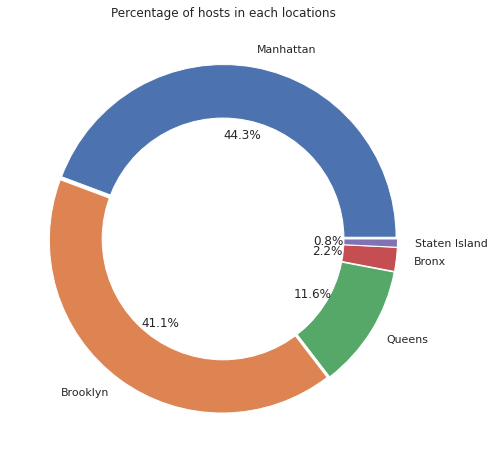

In [26]:
# Lets plot it for better understanding.
fig = plt.figure(figsize=(7,7))
plt.title('Percentage of hosts in each locations')

plt.pie(data=hosts_and_areas_df, x='host_count', labels='area', explode=(0.01,0.01,0.01,0.01,0.01),autopct='%1.1f%%')

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.tight_layout()
plt.show()

*It can be observed that majority of the hosts are belong to the locations* ***Manhatan*** and ***Brooklyn***, *hence these are the most popular destinations.*

In [27]:
# Let's see who has the most listings and in which neighbourhood.
host_listing_areas_df = airbnb_data.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
top_hosts = host_listing_areas_df.sort_values(by = ['calculated_host_listings_count'], ascending = False).head()
top_hosts

,host_name,neighbourhood_group,calculated_host_listings_count
13221,Sonder (NYC),Manhattan,327
1833,Blueground,Brooklyn,232
1834,Blueground,Manhattan,232
7275,Kara,Manhattan,121
7478,Kazuya,Brooklyn,103


**Sonder (NYC)** has the maximum number of count of **327** and belong to Manhattan group.

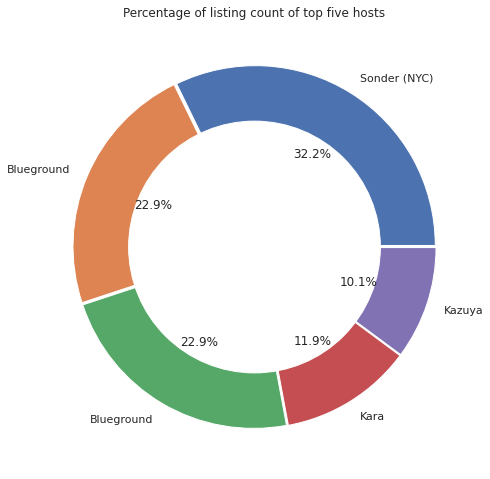

In [28]:
# Lets plot it for better understanding.
fig = plt.figure(figsize=(7,7))
plt.title('Percentage of listing count of top five hosts')

plt.pie(data=top_hosts, x='calculated_host_listings_count', labels='host_name', explode=(0.01,0.01,0.01,0.01,0.01),autopct='%1.1f%%')

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.tight_layout()
plt.show()

## **Which room type is prefered in most popular neighbourhood?**

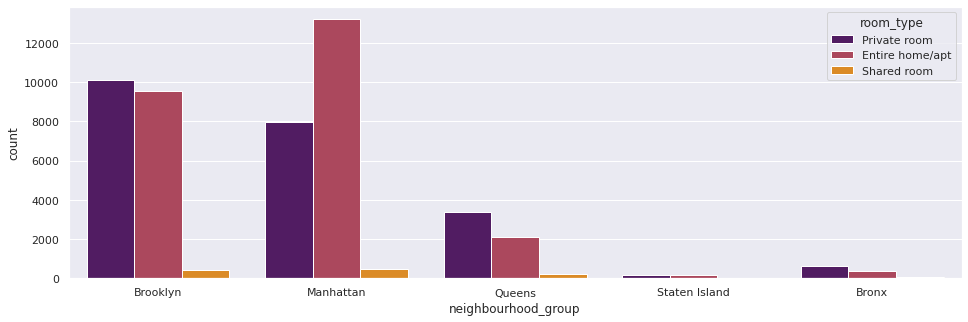

In [29]:
# Check the room type in these popular destinations.
fig = plt.figure(figsize=(16,5))
sns.countplot(data=airbnb_data, x='neighbourhood_group', hue='room_type', palette='inferno')
plt.show()

If people are looking for rooms in these areas of **Manhattan** and **Brooklyn** then hosts are providing either **Private room** or **Entire home/apt**.

## **What can we learn from predictions? (ex: locations, prices, reviews, etc)**

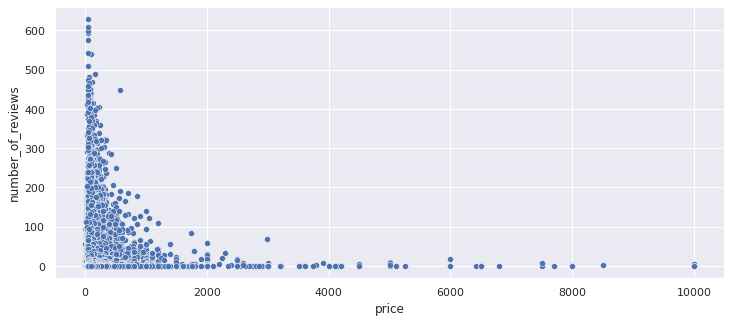

In [30]:
# Observing price and number_of_reviews columns

a, ax = plt.subplots(figsize=(12, 5))
fig = sns.scatterplot(x='price', y='number_of_reviews', data=airbnb_data)


By analysing above plot. we can see that for more price number of reviews are less but as price is somewhat less we get the more reviews.

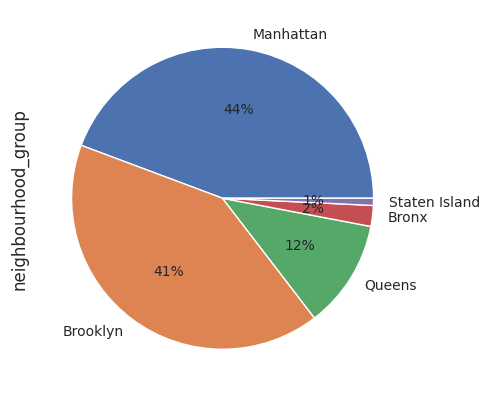

In [31]:
# Plotting neighbourhood_group on a pie-chart

fig = plt.figure(figsize=(5,5), dpi=100)
airbnb_data['neighbourhood_group'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=10)

In [32]:
location_price_df = airbnb_data.groupby(['neighbourhood_group'],as_index=False)['price'].mean().rename(columns={'neighbourhood_group':'area', 'price':'mean_price'})
location_price_df

,area,mean_price
0,Bronx,87.496792
1,Brooklyn,124.383207
2,Manhattan,196.875814
3,Queens,99.517649
4,Staten Island,114.812332


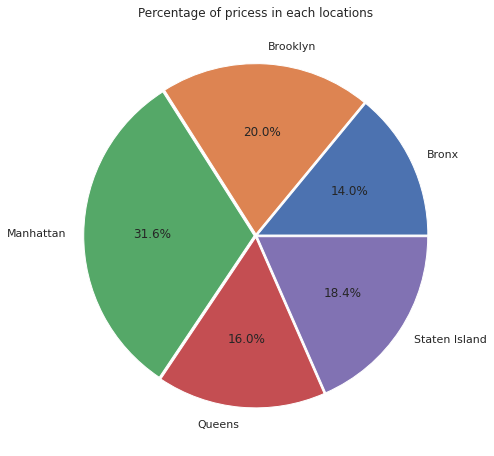

In [33]:
# Lets plot it for better understanding.
fig = plt.figure(figsize=(7,7))
plt.title('Percentage of pricess in each locations')

plt.pie(data=location_price_df, x='mean_price', labels='area', explode=(0.01,0.01,0.01,0.01,0.01),autopct='%1.1f%%')

plt.tight_layout()
plt.show()

***Mean price is highest for Manhatan followed by Brooklyn and other locations.*** ***The higher number of hosts present in these areas might be the reason for these high prices.***

In [34]:
avg_price = (airbnb_data['price'].mean(),2)
print(avg_price)

(152.7206871868289, 2)


Average price of all neighbourhood is $152.74.

## **Which hosts are the busiest and why?**

In [36]:
# check top 10 unique busiest host name 

unique_host_names = airbnb_data['host_name'].value_counts().head(10)
unique_host_names

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Name: host_name, dtype: int64

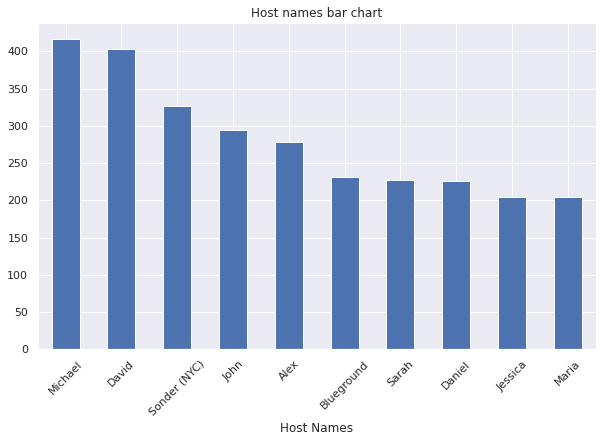

In [37]:
# see in graphs
from matplotlib import style

fig = plt.figure(figsize= (10,6))
bar_hstName = unique_host_names.plot(kind="bar")
bar_hstName.set_title('Host names bar chart')
bar_hstName.set_xlabel('Host Names')
bar_hstName.set_xticklabels(bar_hstName.get_xticklabels(), rotation=45)
style.use('ggplot')

plt.show()


### total no.of nights spent per room types

In [38]:
#Busiest hosts would be those who have maximum number of reviews as people are booking frequently at those hosts.
busiest_hosts_by_review = airbnb_data.groupby(['neighbourhood_group'])['number_of_reviews'].sum().reset_index()
busiest_hosts_by_review = busiest_hosts_by_review.sort_values(by='number_of_reviews', ascending=False)
busiest_hosts_by_review

,neighbourhood_group,number_of_reviews
1,Brooklyn,486574
2,Manhattan,454569
3,Queens,156950
0,Bronx,28371
4,Staten Island,11541


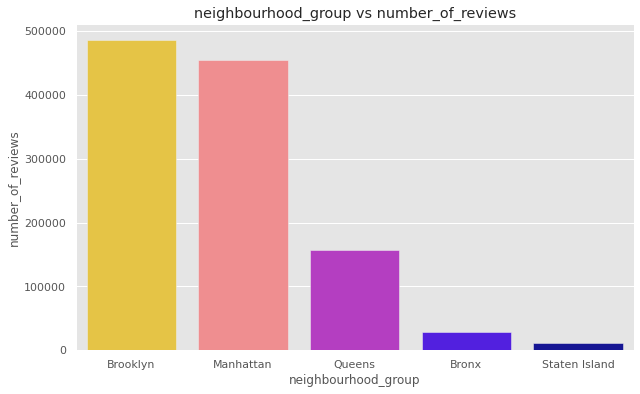

In [39]:
# Create a plot to view the results.
fig = plt.figure(figsize=(10,6))
plt.title('neighbourhood_group vs number_of_reviews')
sns.barplot(data=busiest_hosts_by_review, x='neighbourhood_group', y='number_of_reviews', palette='gnuplot2_r')
plt.show()

The neighbourhood_groups **Manhatan** and **Brooklyn** recieve the most number of reviews,Thus making the hosts from these areas the most busiest among all others.

In [40]:
#Busiest hosts would be those who have maximum availability_365 as people are booking frequently at those hosts.
busiest_hosts_by_availability = airbnb_data.groupby(['neighbourhood_group'])['availability_365'].mean().reset_index()
busiest_hosts_by_availability = busiest_hosts_by_availability.sort_values(by='availability_365', ascending=False)
busiest_hosts_by_availability

,neighbourhood_group,availability_365
4,Staten Island,199.678284
0,Bronx,165.758937
3,Queens,144.451818
2,Manhattan,111.979410
1,Brooklyn,100.232292


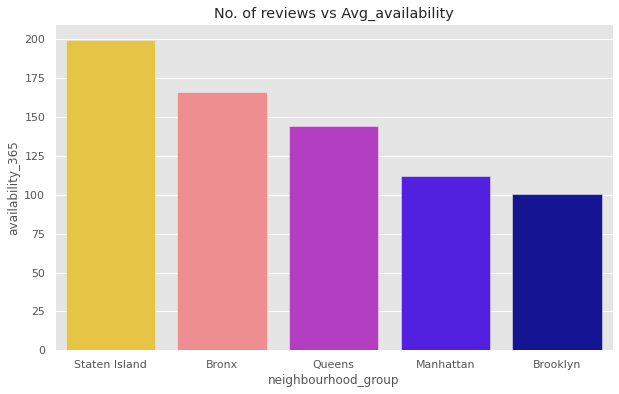

In [41]:
# Create a plot to view the results.
fig = plt.figure(figsize=(10,6))
plt.title('No. of reviews vs Avg_availability')
sns.barplot(data=busiest_hosts_by_availability, x='neighbourhood_group', y='availability_365', palette='gnuplot2_r')
plt.show()

As we have seen Mahattan and brooklyn have maximum number of reviews, so offering the most desired room_types.
Thus for these groups availability of rooms is less.

In [42]:
# Now merge the both datasets.
busiest_host_df = pd.merge(busiest_hosts_by_review,busiest_hosts_by_availability,
                            on = ['neighbourhood_group']).sort_values(['availability_365','number_of_reviews'],
                            ascending = [True,False])

# Check the top entries.                        
busiest_host_df.head()

,neighbourhood_group,number_of_reviews,availability_365
0,Brooklyn,486574,100.232292
1,Manhattan,454569,111.979410
2,Queens,156950,144.451818
3,Bronx,28371,165.758937
4,Staten Island,11541,199.678284


**Brooklyn** has the maximum number of reviews **486574** and least availability of rooms by average is **100.23**.

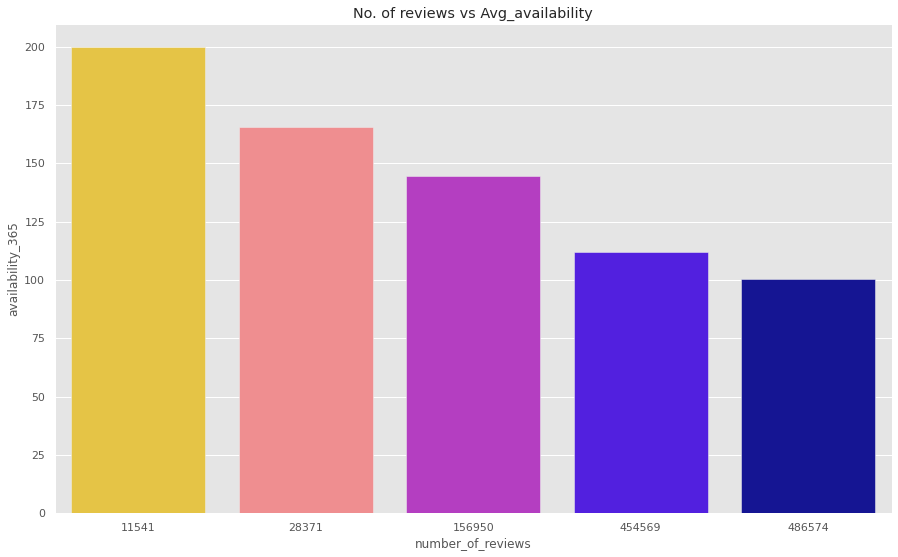

In [43]:
# Create a plot to view the results.
fig = plt.figure(figsize=(15,9))
plt.title('No. of reviews vs Avg_availability')
sns.barplot(data=busiest_host_df, x='number_of_reviews', y='availability_365', palette='gnuplot2_r')
plt.show()

The above barplot shows the relation of number of reviews with the availability of these rooms throughout the year. This relation shows that as the number of reviews increase the availability descreases.

## **Is there any noticeable difference of traffic among different areas and what could be the reason for it?**

In [45]:
'''To check the traffic among different areas we will check the number of night spends in those areas'''
traffic_by_areas = airbnb_data.groupby(['neighbourhood_group'])['minimum_nights'].sum().reset_index()
traffic_by_areas = traffic_by_areas.sort_values(by='minimum_nights', ascending=False)
traffic_by_areas

,neighbourhood_group,minimum_nights
2,Manhattan,185833
1,Brooklyn,121761
3,Queens,29358
0,Bronx,4976
4,Staten Island,1802


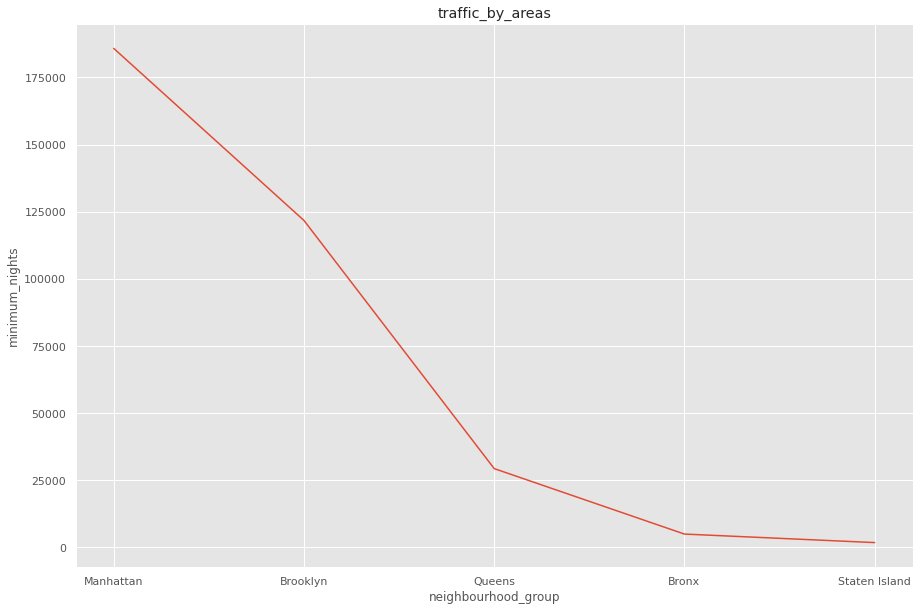

In [46]:
# Visualize it to understand better.
fig = plt.figure(figsize=(15,10))
plt.title('traffic_by_areas')
sns.lineplot(y='minimum_nights', x='neighbourhood_group', data=traffic_by_areas)
plt.show()

As from the above figure,there's a huge difference in the traffic between the different locations. There might be many reasons for that.Let's find out

1. As we saw number of reviews are maximum for three locations Manhaten, Brooklyn and Queens. So people are choosing these locations.

2. Maximum number of the hosts belong to these locations. There are many options for the customers to choose as compared to other locations due to more hosts.

3. These locations are attaracting people also because of its room type.

## **Other Obervations:**

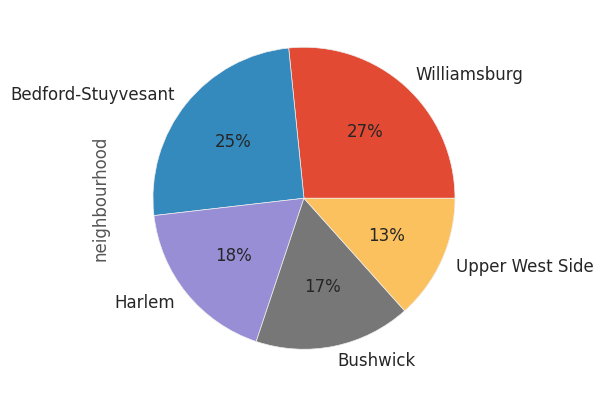

In [48]:
# Analyzing top busiest neighbourhood

fig = plt.figure(figsize=(5,5), dpi=100)
airbnb_data['neighbourhood'].value_counts().head().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=12)

In [49]:
airbnb_data.groupby(['neighbourhood_group','neighbourhood','room_type'])['number_of_reviews'].max().reset_index().sort_values(by = 'number_of_reviews', ascending = False).head(10)

,neighbourhood_group,neighbourhood,room_type,number_of_reviews
398,Queens,Jamaica,Private room,629
273,Manhattan,Harlem,Private room,607
369,Queens,East Elmhurst,Private room,543
288,Manhattan,Lower East Side,Private room,540
214,Brooklyn,Park Slope,Entire home/apt,488
146,Brooklyn,Bushwick,Private room,480
379,Queens,Flushing,Private room,474
230,Brooklyn,South Slope,Entire home/apt,467
399,Queens,Jamaica,Shared room,454
259,Manhattan,East Village,Private room,451


The most popular neighbourhood is **Jamaica** from **Queens** group which opted for Private room.

## **Conclusions:**

1. Starting with the dataset loading, we have performed data pre-processing, EDA.

2. Manhattan and Brooklyn are the two top most popular neighbourhood groups in terms of hosts count, number of reviews ,number of listing,maximum number of nights spends in these areas. So it might also be reason of traffic and high prices.

3. For other neighbourhood groups namely Queens, Bronx and Staten island there aren't as popular as these two, especially on Staten Island.

4. The dataset can be further used for price prediction by building a linear model. The data needs to be treated of outliers and skewness for a linear regression as well as other models.

## **Thank You**